# Estimation of Obesity Levels Based On Eating Habits and Physical Conditions
Key Features: gender, age, height, weight, eating habits, physical conditon, lifestyle habits \
Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition \
The estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61

In [1]:
### Verify all libraries are installed in your machine first. 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np 

In [17]:
# Import cleaned dataframe from EDA notebook. 

df = pd.read_csv("DataSets/cleaned_df.csv")

pd.set_option('display.max_columns', None)


In [3]:
df

,gender,age,height,Weight,family_history_with_overweight,eat_high_calorie_frequently,eat_vegetables_usually,daily_meal_count,snack_between_meals,smoke,daily_water_intake,monitor_calories,activity_frequency,time_on_technology,alcohol_frequency,transportation,obesity_level,bmi,obese
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public Transportation,Normal Weight,24.386526,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight,24.238227,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public Transportation,Normal Weight,23.765432,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight Level I,26.851852,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II,28.342381,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III,44.901475,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III,43.741923,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III,43.543817,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III,44.071535,1


# Correlation Matrix

In [4]:
# Prepare DataFrame for correlation analysis 
def df_spearmans(df_input):
    df = df_input.drop(columns=['gender', 'bmi', 'Weight']) #dropping columns we dont want to look at 


    # Mappings for ordinal and categorical values to convert them to numeric values
    ordinal_mappings = {
        'obesity_level':{'Normal Weight':1, 'Overweight Level I':2, 'Overweight Level II':3,
             'Obesity Type I':4, 'Insufficient Weight':0, 'Obesity Type II':5,
             'Obesity Type III':6},
        'family_history_with_overweight': {'yes': 1, 'no': 0},  
        'eat_high_calorie_frequently': {'yes': 1, 'no': 0},  
        'smoke': {'yes': 1, 'no': 0},         
        'alcohol_frequency': {'Always':3, 'Frequently': 2, 'Sometimes': 1, 'no': 0},  
        'snack_between_meals': {'Always':3, 'Frequently': 2, 'Sometimes': 1, 'no': 0}, 
        'monitor_calories': {'no': 0, 'yes': 1},             
        'transportation': {
            'Automobile': 4,
            'Motorbike': 3,  
            'Public Transportation': 2,
            'Walking': 0,
            'Bike':1
        }
    }


    # Creating bins for continuous data
    df['daily_water_intake'] = pd.cut(
        df['daily_water_intake'],
        bins=[0,1.5,2.5,3],
        labels=[0,1,2]
    )
    
    df['activity_frequency'] = pd.cut(
        df['activity_frequency'],
        bins=[-.1, 1, 2, 3],
        labels= [0,1,2]
    )
    
    df['time_on_technology'] = pd. cut(
        df['time_on_technology'],
        bins=[-.1, .5, 1.5, 2],
        labels = [0,1,2]
    )
    
    df['age'] = pd.cut(
        df['age'],
        bins=[0,20,30,40,61],
        labels = [0,1,2,3]
    )
    
    df['height'] = pd.cut(
        df['height'],
        bins=[0, 1.6, 1.7, 1.8, df['height'].max()],
        labels=[0, 1, 2, 3]
    )
    df['eat_vegetables_usually'] = pd.cut(
        df['eat_vegetables_usually'],
        bins = [.5,1.5,2, 2.5,3],
        labels = [0,1,2,3]
    )

    # map remaining ordinal categorical columns
    for col, mapping in ordinal_mappings.items():
        df[col] = df[col].map(mapping)

    return df.rename(columns={'obesity_level':'Bodyweight'})

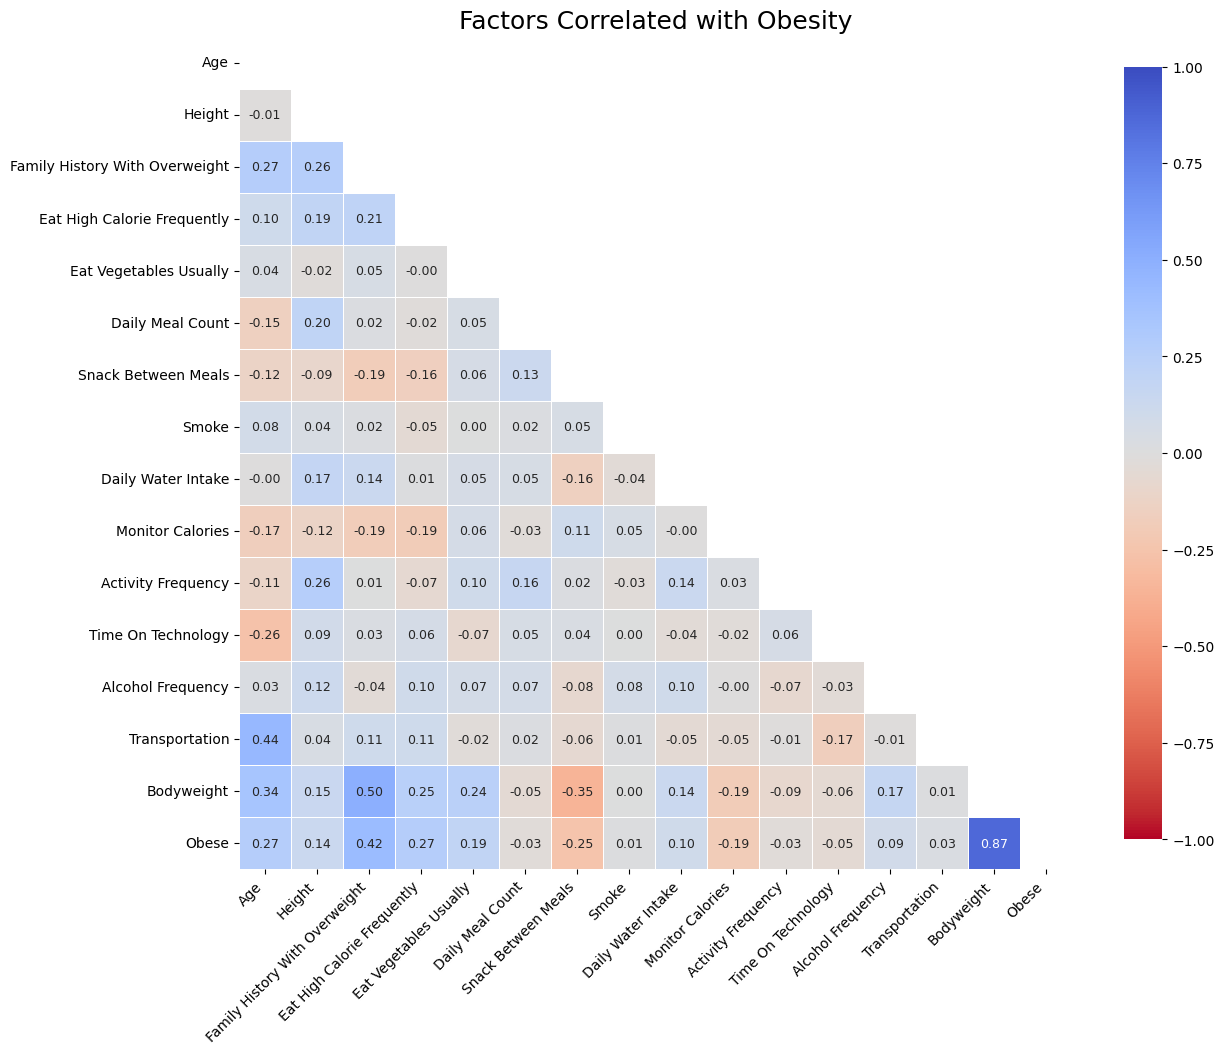

In [5]:
# Compute spearman correlation matrix with cleaned data
corr_matrix = df_spearmans(df).corr(method='spearman')

# Mask the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Format labels (convert snake_case to Title Case)
formatted_labels = [label.replace('_', ' ').title() for label in corr_matrix.columns]
corr_matrix.columns = formatted_labels
corr_matrix.index = formatted_labels

# Plot
# Compute min and max correlation values for color scaling
plt.figure(figsize=(13, 11))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm_r',   # Reversed: blue for positive, red for negative
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"shrink": 0.85}
)

# Renaming the axis 
plt.title("Factors Correlated with Obesity", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Relative Risk

- Relative Risk for individuals with family history of overweight and obesity

In [6]:
# Proportion of obese individuals with family history = yes
p1 = ((df['obese'] == 1) & (df['family_history_with_overweight'] == 'yes')).sum() / \
     (df['family_history_with_overweight'] == 'yes').sum()

# Proportion of obese individuals with family history = no
p2 = ((df['obese'] == 1) & (df['family_history_with_overweight'] == 'no')).sum() / \
     (df['family_history_with_overweight'] == 'no').sum()

# Relative Risk
RR_family_history= p1 / p2

print("Relative Risk (RR):", RR_family_history)


Relative Risk (RR): 26.934385863267668


- Relative Risk for eating high calorie frequency and obesity

In [7]:
# Proportion of obese individuals with eat_high_calories_frequently = yes
p1 = ((df['obese'] == 1) & (df['eat_high_calorie_frequently'] == 'yes')).sum() / \
     (df['eat_high_calorie_frequently'] == 'yes').sum()

# Proportion of obese individuals with eat_high_calorie_frequently = no
p2 = ((df['obese'] == 1) & (df['eat_high_calorie_frequently'] == 'no')).sum() / \
     (df['eat_high_calorie_frequently'] == 'no').sum()

# Relative Risk
RR_eat_high_calorie = p1 / p2

print("Relative Risk (RR):", RR_eat_high_calorie)

Relative Risk (RR): 5.681574588327001


- Relative Risk for monitoring calories and obesity

- Relative Risk for individuals with family history of overweight and obesity

In [8]:
# Proportion of obese individuals with monitor_calories = yes
p1 = ((df['obese'] == 1) & (df['monitor_calories'] == 'yes')).sum() / \
     (df['monitor_calories'] == 'yes').sum()

p2 = ((df['obese'] == 1) & (df['monitor_calories'] == 'no')).sum() / \
     (df['monitor_calories'] == 'no').sum()

# Relative Risk
RR_3 = p1 / p2
RR_no_monitor = RR_3 **(-1)

print("Relative Risk (RR):", RR_no_monitor)

Relative Risk (RR): 15.420347394540942


In [9]:
# Proportion of obese individuals that are male
p1 = ((df['obese'] == 1) & (df['gender'] == 'Male')).sum() / \
     (df['gender'] == 'Male').sum()

# Proportion of obese individuals that are female
p2 = ((df['obese'] == 1) & (df['gender'] == 'Female')).sum() / \
     (df['gender'] == 'Female').sum()

# Relative Risk
RR_male = p1 / p2

print("Relative Risk (RR):", RR_male)


Relative Risk (RR): 0.9968530001398668


In [10]:
# Proportion of obese individuals that smoke
p1 = ((df['obese'] == 1) & (df['smoke'] == 'yes')).sum() / \
     (df['smoke'] == 'yes').sum()

# Proportion of obese individuals that do not smoke
p2 = ((df['obese'] == 1) & (df['smoke'] == 'no')).sum() / \
     (df['smoke'] == 'no').sum()

# Relative Risk
RR_smoke = p1 / p2

print("Relative Risk (RR):", RR_smoke)


Relative Risk (RR): 1.0856092436974791


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_15296/2423179418.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=rr_df, x='Feature', y='Relative Risk', palette='Set2')
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_15296/2423179418.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=rr_df, x='Feature', y='Relative Risk', palette='Set2')


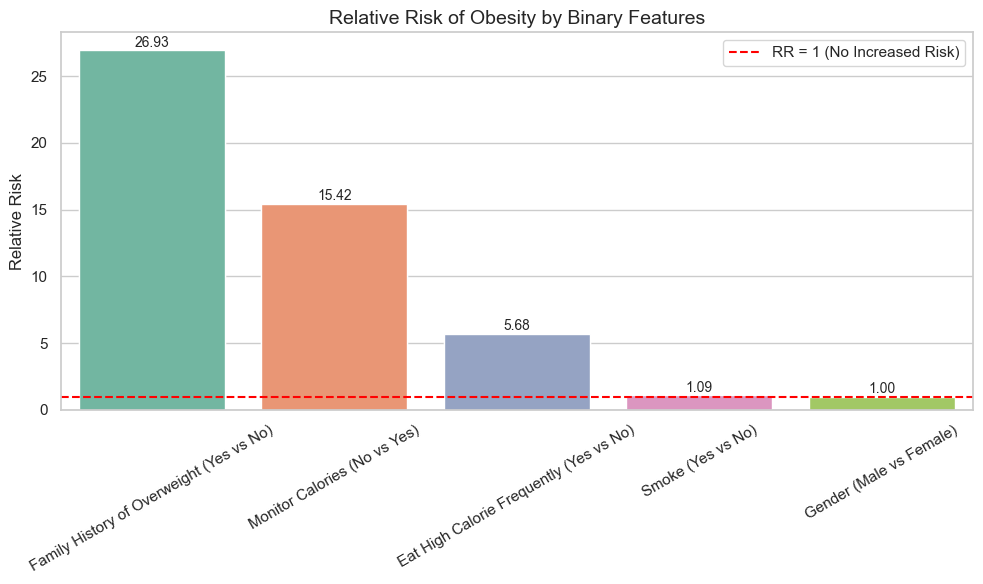

In [11]:
features = [
    'Family History of Overweight (Yes vs No)',
    'Eat High Calorie Frequently (Yes vs No)',
    'Monitor Calories (No vs Yes)',
    'Gender (Male vs Female)',
    'Smoke (Yes vs No)'
]

rr_values = [
    RR_family_history,   # Family History
    RR_eat_high_calorie,  # Eat High Calorie
    RR_no_monitor,  # Do Not Monitor Calories
    RR_male,  # Gender = male
    RR_smoke    # Smoke
]

# Relative Risk dataframe
rr_df = pd.DataFrame({
    'Feature': features,
    'Relative Risk': rr_values
}).sort_values('Relative Risk', ascending=False)



# Plotting RR
sns.set(style='whitegrid', palette='Set2')
plt.figure(figsize=(10, 6))

bars = sns.barplot(data=rr_df, x='Feature', y='Relative Risk', palette='Set2')

# Add value labels on top of bars
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.05,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )
    
bars = sns.barplot(data=rr_df, x='Feature', y='Relative Risk', palette='Set2')
plt.axhline(1, color='red', linestyle='--', label='RR = 1 (No Increased Risk)')
plt.title('Relative Risk of Obesity by Binary Features', fontsize=14)
plt.ylabel('Relative Risk')
plt.xlabel('')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()


# Plots for Analysis

In [12]:
sns.set(style="whitegrid", palette="muted") 

#Ensures that models are plotting categories in the correct order 
obesityOrder = ['Insufficient Weight',
    'Normal Weight',
    'Overweight Level I',
    'Overweight Level II',
    'Obesity Type I',
    'Obesity Type II',
    'Obesity Type III']

### Family History with Obesity vs Obesity Level

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/2326113186.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


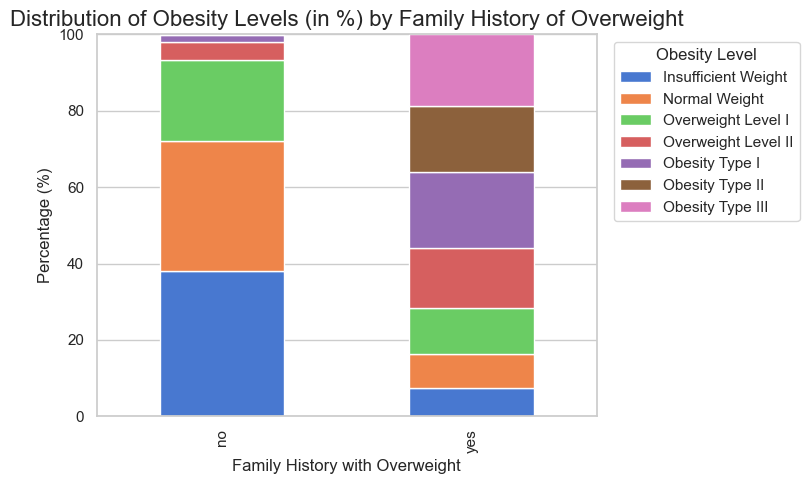

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/2326113186.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


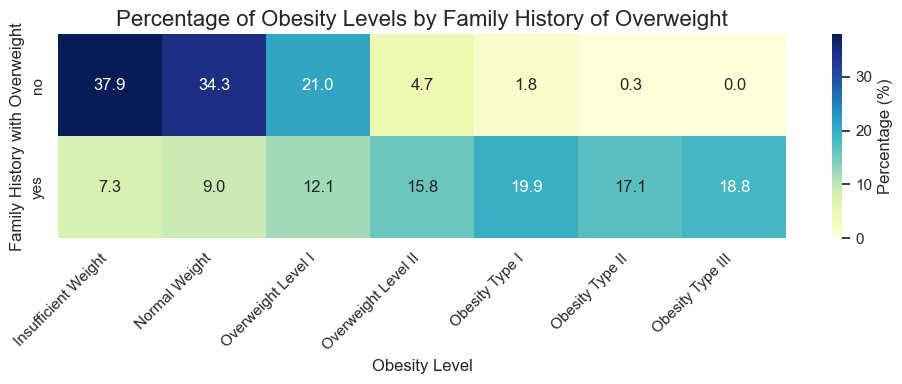

In [15]:
counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Family History with Overweight', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Family History of Overweight', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['family_history_with_overweight', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Family History of Overweight', fontsize=16)
plt.ylabel('Family History with Overweight', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### High Calorie Food Consumption vs Obesity Level

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/1906480992.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


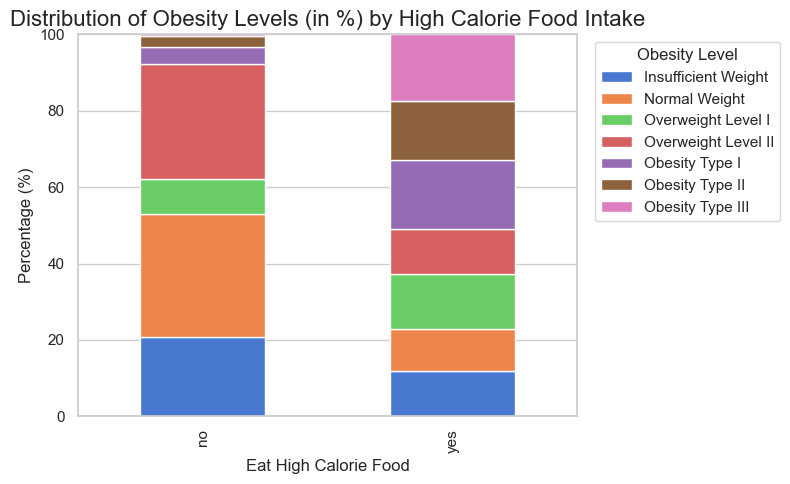

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/1906480992.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


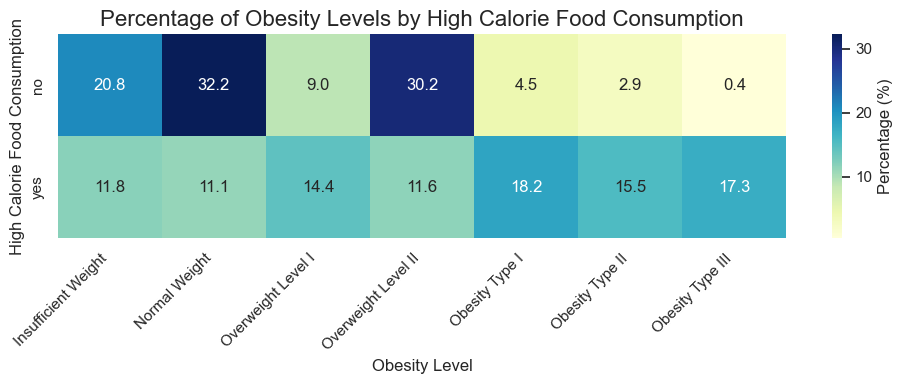

In [16]:
counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Eat High Calorie Food', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by High Calorie Food Intake', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['eat_high_calorie_frequently', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 4))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by High Calorie Food Consumption', fontsize=16)
plt.ylabel('High Calorie Food Consumption', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/3139266653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


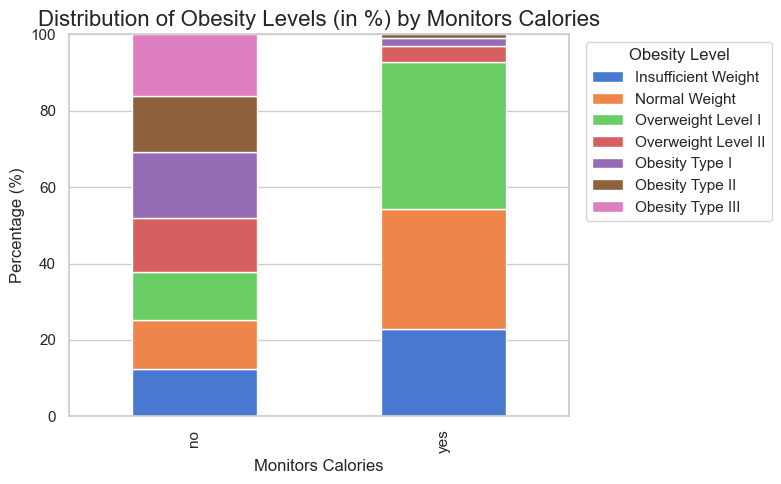

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_51339/3139266653.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df


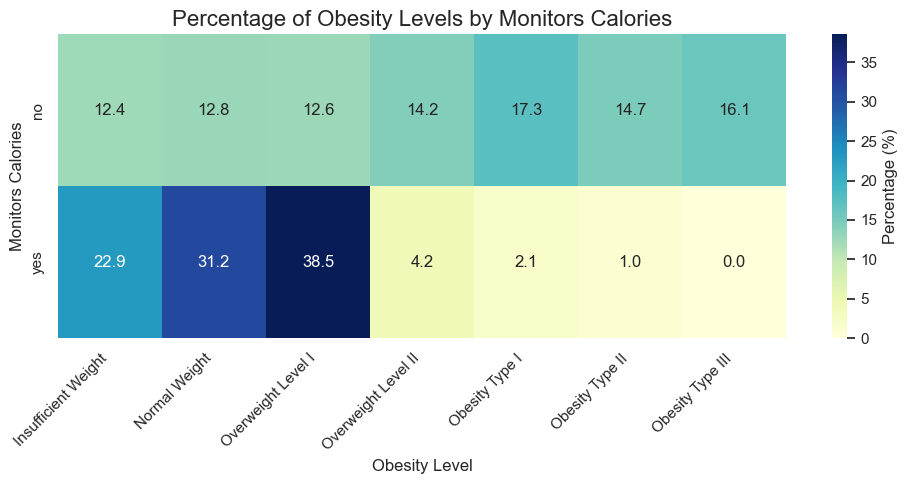

In [22]:
counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
)

# 3. Reorder columns so the stacks go in the logical order
counts = counts.reindex(columns=obesityOrder)

# 4. Convert to percentages by dividing each row by its row-sum
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 5. Plot the stacked bar chart of percentages
ax = percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

# 6. Polish labels, title, legend
ax.set_xlabel('Monitors Calories', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Distribution of Obesity Levels (in %) by Monitors Calories', fontsize=16)
ax.set_ylim(0, 100)
ax.legend(title='Obesity Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

counts = (
    df
    .groupby(['monitor_calories', 'obesity_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=obesityOrder)
)

# 3. Convert to row‐percentages (so each family‐history row sums to 100%):
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# 4. Plot the heatmap:
plt.figure(figsize=(10, 5))
sns.heatmap(
    percentages,
    annot=True,          # show the numbers in each cell
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # a blue‐green color scale
    cbar_kws={'label': 'Percentage (%)'}
)

# 5. Labels & titles:
plt.title('Percentage of Obesity Levels by Monitors Calories', fontsize=16)
plt.ylabel('Monitors Calories', fontsize=12)
plt.xlabel('Obesity Level', fontsize=12)
plt.xticks(rotation=45, ha='right')  # tilt long category names
plt.tight_layout()
plt.show()

### Family History with Obesity vs Obesity Level